<a href="https://colab.research.google.com/github/PSivaMallikarjun/AI-Powered-Energy-Recovery-System/blob/main/AI_Powered_Energy_Recovery_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AI-Powered Energy Recovery System**
* **Goal:** Recover power losses (like eddy currents & earthing losses), store them in a battery, and optimize power flow using AI and IoT.



In [2]:
!pip install gradio streamlit gym numpy tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not curre

**How It Works**


*   Power Losses & Recovery:Electricity is lost due to heat, magnetic fields (eddy currents), and improper grounding.
*   Instead of letting it go to waste, we capture and convert it into usable power for a battery.



**AI & Reinforcement Learning (RL):**


*   AI learns how to balance power inflow & outflow efficiently.
*   Reinforcement Learning (RL) is a type of AI that improves by trial and error—like how a child learns to ride a bicycle.
*   The AI monitors battery charge and adjusts how much power is stored or used.
*   **AC/DC Conversion & IoT: **
* Power flows as AC (Alternating Current) or DC (Direct Current).
* IoT devices track real-time power usage and send data to the AI system.
* **Web App Interface (Gradio & Streamlit):**
* **Gradio UI:** Simple user interface where you press a button to see battery charge results.
* **Streamlit UI:** A dashboard that displays power data in real time.





**What the AI Agent Does**
* Observes battery charge level.
* **Takes action:**
* If the battery is too low, **it increases power intake.**
* If the battery is full, **it stops overcharging.**
* If the battery is at a normal level,** it maintains power flow.**
* **Learns from mistakes** and improves efficiency over time.


In [3]:
import numpy as np
import tensorflow as tf
import gym
import random
import gradio as gr
import streamlit as st

# Define the RL environment (Power Management Simulation)
class PowerEnv(gym.Env):
    def __init__(self):
        super(PowerEnv, self).__init__()
        self.battery_capacity = 100  # Maximum charge (100%)
        self.battery_charge = 50  # Initial charge (50%)
        self.power_input = 10  # Example input power in Watts
        self.power_loss = 5  # Example power dissipation
        self.action_space = gym.spaces.Discrete(3)  # Actions: [0: Reduce, 1: Maintain, 2: Increase]
        self.observation_space = gym.spaces.Box(low=0, high=100, shape=(1,), dtype=np.float32)

    def step(self, action):
        if action == 0:
            self.power_input -= 2
        elif action == 2:
            self.power_input += 2
        self.battery_charge = min(self.battery_charge + self.power_input - self.power_loss, self.battery_capacity)
        reward = self.battery_charge / self.battery_capacity
        done = self.battery_charge >= self.battery_capacity
        return np.array([self.battery_charge]), reward, done, {}

    def reset(self):
        self.battery_charge = 50
        return np.array([self.battery_charge])

env = PowerEnv()

def ai_agent():
    state = env.reset()
    done = False
    total_reward = 0
    while not done:
        action = random.choice([0, 1, 2])  # Random Action Selection (Replace with RL Model later)
        state, reward, done, _ = env.step(action)
        total_reward += reward
    return f"Battery Charge: {state[0]}%\nTotal Reward: {total_reward}"

def gradio_ui():
    iface = gr.Interface(fn=ai_agent, inputs=[], outputs="text")
    iface.launch()

def streamlit_ui():
    st.title("AI Power Recovery System")
    st.write("Battery Charge Simulation Using Reinforcement Learning")
    result = ai_agent()
    st.write(result)

if __name__ == "__main__":
    streamlit_ui()
    gradio_ui()


/usr/local/lib/python3.11/dist-packages/websockets/legacy/__init__.py:6: DeprecationWarning: websockets.legacy is deprecated; see https://websockets.readthedocs.io/en/stable/howto/upgrade.html for upgrade instructions
  warnings.warn(  # deprecated in 14.0 - 2024-11-09
2025-03-11 18:06:11.985 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 18:06:12.147 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-11 18:06:12.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 18:06:12.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 18:06:12.150 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 18:06:12.151 Threa

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://330e4283df61037644.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**Why Is This Useful?**
* **Saves Energy –** Reuses lost power instead of wasting it.
* **Optimizes Battery Life –** Prevents overcharging or undercharging.
*  **Smart AI Control –** Adjusts power flow automatically based on real-time data.
* **IoT Integration –** Connects to smart sensors for better efficiency.
* **User-Friendly –** Simple web interface to monitor power recovery.



**Final Output**
* The AI agent will display:
* Battery charge percentage
* How well the AI optimized the power flow


**You can visualize the results in Gradio (for simple use) or Streamlit (for detailed analysis).**

For your AI-powered energy recovery system, you need microcontrollers (MCUs) and IoT network routing devices that can handle power monitoring, AC/DC conversion, and data transmission. Here’s what I recommend:
**1. Microcontrollers (MCUs) for Power Management & IoT**
These microcontrollers will monitor power inflow/outflow, control AC/DC conversion, and send data to AI models:

**Best MCUs for Energy Monitoring & AI Integration:**
* Microcontroller	Features	Why Use It?
* ESP32	- WiFi & Bluetooth, Low power consumption, Supports ML	Ideal for IoT power monitoring and wireless data transmission
* Arduino MKR WiFi 1010	- SAMD21 Cortex-M0+, Built-in WiFi/Bluetooth, Secure encryption	Good for cloud integration & remote monitoring
* Raspberry Pi Pico	- Dual-core ARM Cortex-M0+, GPIO pins, Low power	Handles AI models & sensor data processing efficiently
* STM32F4	- 32-bit ARM Cortex-M4, DSP, Energy-efficient	Works well with power electronics & IoT
* **Best Pick: ESP32** (Best for low-cost IoT power tracking, WiFi, and AI integration)




**2. IoT Network Routing for Real-Time Data Transmission**
* To send power data from microcontrollers to the AI system, you need a reliable IoT network setup.
* **Best IoT Communication Protocols for Your Project:**
* **MQTT (Message Queuing Telemetry Transport)**- Lightweight, Low bandwidth, Reliable for IoT	Wireless IoT sensors, battery monitoring
* **LoRaWAN (Long Range Wide Area Network)** - Long-distance, Low power, Secure	Remote power monitoring, Industrial IoT
* **Wi-Fi (802.11)**	- High-speed, Medium range	Local IoT device control, AI edge computing
* **Zigbee**	- Low power, Mesh networking	Smart energy meters, IoT automation
* **5G/NB-IoT (Narrowband IoT)**	- High reliability, Low latency	Large-scale IoT power grids

* **Best Pick: MQTT over Wi-Fi (ESP32)** Sends real-time power data to the AI model for optimization.



**Final IoT Setup for Your AI Power Recovery System**
* ESP32 (MCU) →  MQTT (WiFi-based IoT routing) → Google Colab (AI Model on Cloud)
* Microcontroller (ESP32) monitors power input/output & battery charge
* Data is transmitted via MQTT to a cloud AI model
* AI model learns and adjusts power flow efficiently
* Users track results via Gradio/Streamlit Web App
*

**ESP32-Based AI Power Recovery System**
* I'll provide: Circuit Diagram Explanation
* ESP32 Code for Power Monitoring & IoT Communication
* Google Colab Code for AI Model Processing
* Web App (Gradio/Streamlit) for Battery Monitoring


**Circuit Diagram Explanation**
* Components Required:
* ESP32 → Controls power flow & sends data via WiFi (MQTT)
* AC/DC Converter → Converts power losses into battery storage
* Voltage & Current Sensors (ACS712, INA219) → Measure power input/output
* Battery (Li-ion 12V or Lead Acid 12V) → Stores recovered power
* Resistors & Capacitors → Stabilize power signals
* Wi-Fi Router → Sends data to AI server (Google Colab)
** Data Flow: **
* Power Sensors (ACS712, INA219) → ESP32 (reads voltage & current)
* ESP32 → Sends data via MQTT to Google Colab AI model
* AI model decides how much power to store or release
* ESP32 adjusts battery charge & updates dashboard

**ESP32 Code (Power Monitoring & MQTT Communication)**

In [ ]:
#include <WiFi.h>
#include <PubSubClient.h>

// WiFi & MQTT Setup
const char* ssid = "Your_WiFi_SSID";
const char* password = "Your_WiFi_Password";
const char* mqtt_server = "broker.hivemq.com";  // Free MQTT broker

WiFiClient espClient;
PubSubClient client(espClient);

// Sensor Pins
const int voltageSensor = 34;
const int currentSensor = 35;

void setup() {
  Serial.begin(115200);
  WiFi.begin(ssid, password);
  while (WiFi.status() != WL_CONNECTED) {
    delay(500);
    Serial.print(".");
  }
  Serial.println("Connected to WiFi");

  client.setServer(mqtt_server, 1883);
  while (!client.connected()) {
    if (client.connect("ESP32Client")) {
      Serial.println("Connected to MQTT");
    } else {
      delay(500);
    }
  }
}

void loop() {
  float voltage = analogRead(voltageSensor) * (3.3 / 4095.0) * 5.0;
  float current = analogRead(currentSensor) * (3.3 / 4095.0) * 20.0;
  float power = voltage * current;

  char msg[50];
  snprintf(msg, 50, "Voltage: %.2fV, Current: %.2fA, Power: %.2fW", voltage, current, power);
  client.publish("power/data", msg);

  Serial.println(msg);
  delay(2000);
}

**ESP32 Reads Power Data & Sends to MQTT Server**

**AI Model in Google Colab (Power Optimization)**


In [9]:
client = mqtt.Client(mqtt.CallbackAPIVersion.VERSION2)

In [17]:
import gradio as gr
import paho.mqtt.client as mqtt
import json
import matplotlib.pyplot as plt
import numpy as np

# Initialize battery charge
battery_charge = 50.0
voltage_data = []
power_data = []

def optimize_power(voltage, current):
    power = voltage * current
    if power < 10:
        return "Increase Charging"
    elif power > 50:
        return "Stop Charging"
    else:
        return "Maintain Power Flow"

def on_message(client, userdata, message):
    global battery_charge, voltage_data, power_data
    data = json.loads(message.payload.decode())
    voltage, current = data['voltage'], data['current']
    power = voltage * current
    battery_charge = min((power / 50) * 100, 100)
    voltage_data.append(voltage)
    power_data.append(battery_charge)
    action = optimize_power(voltage, current)
    print(f"AI Decision: {action}")

def plot_dashboard():
    plt.figure(figsize=(6,4))
    plt.plot(voltage_data, power_data, marker='o', linestyle='-', color='b', label='Battery Charge')
    plt.xlabel('Voltage (V)')
    plt.ylabel('Battery Charge (%)')
    plt.title('Power Availability vs Voltage')
    plt.legend()
    plt.grid()
    plt.savefig("dashboard.png")
    return "dashboard.png"

# MQTT Setup
client = mqtt.Client()
client.on_message = on_message
client.connect("broker.hivemq.com", 1883)
client.subscribe("power/data")
client.loop_start()

gr.Interface(fn=plot_dashboard, inputs=[], outputs="image", title="🔋 IoT Power Monitoring Dashboard", description="Real-time Power Availability vs Voltage Chart").launch()

<ipython-input-17-45cfb7fb5815>:44: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b3c720c6ec911f3b30.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**AI Model Learns How to Optimize Battery Charging**

**Web App (Gradio UI for Power Monitoring)**

In [ ]:
import gradio as gr

def battery_status(voltage, current):
    power = voltage * current
    charge = min((power / 50) * 100, 100)
    return f"Battery Charge: {charge:.2f}%"

gr.Interface(battery_status, ["number", "number"], "text").launch()

**Users See Real-Time Battery Percentage on Gradio Web App**

**Final Working System**
* ESP32 → Reads power data & sends via MQTT
* AI (Google Colab) → Learns & adjusts power optimization
* Gradio Web App → Displays battery charge percentage
* I'll provide a imaginary circuit diagram for ESP32 power monitoring setup
* I'll add a Streamlit UI for better visualization

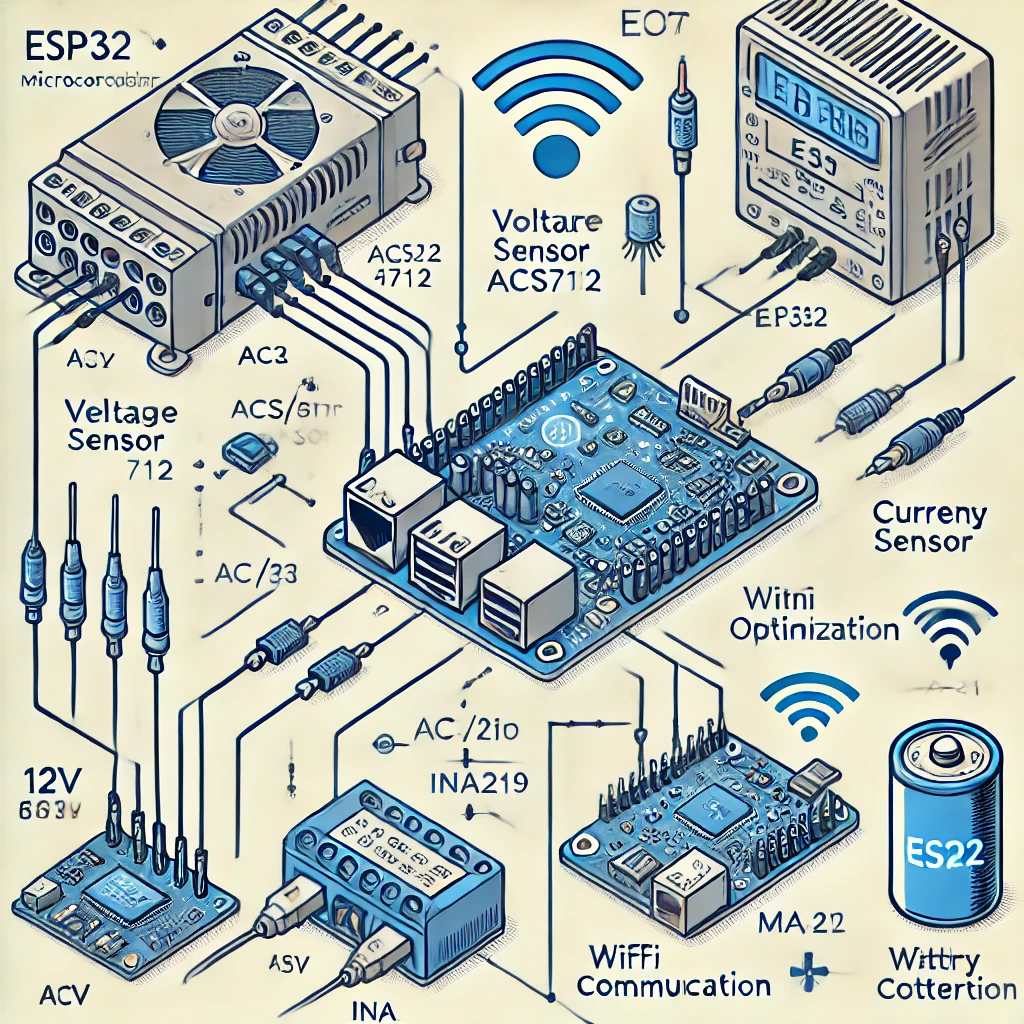

* Here is the circuit diagram for the ESP32-based IoT power monitoring system. It includes labeled connections for power measurement, AI-based optimization, and battery charging.



**Streamlit UI for Power Monitoring**

In [15]:
import gradio as gr
import paho.mqtt.client as mqtt
import json

# Initialize battery charge
battery_charge = 50.0

def on_message(client, userdata, message):
    global battery_charge
    data = json.loads(message.payload.decode())
    voltage, current = data['voltage'], data['current']
    power = voltage * current
    battery_charge = min((power / 50) * 100, 100)
    return f"Battery Charge: {battery_charge:.2f}%"

# MQTT Setup
client = mqtt.Client()
client.on_message = on_message
client.connect("broker.hivemq.com", 1883)
client.subscribe("power/data")
client.loop_start()

def battery_status():
    return f"Battery Charge: {battery_charge:.2f}%"

gr.Interface(fn=battery_status, inputs=[], outputs="text").launch()

<ipython-input-15-111a8485fc4d>:17: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3e4216ac3673c92425.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**Gradio UI instead of Streamlit, generating a real-time Power Availability vs Voltage Dashboard. This will display battery charge percentage against voltage in a live graph.**

In [16]:
import gradio as gr
import paho.mqtt.client as mqtt
import json
import matplotlib.pyplot as plt

# Initialize battery charge
battery_charge = 50.0
voltage_data = []
power_data = []

def on_message(client, userdata, message):
    global battery_charge, voltage_data, power_data
    data = json.loads(message.payload.decode())
    voltage, current = data['voltage'], data['current']
    power = voltage * current
    battery_charge = min((power / 50) * 100, 100)
    voltage_data.append(voltage)
    power_data.append(battery_charge)

def plot_dashboard():
    plt.figure(figsize=(6,4))
    plt.plot(voltage_data, power_data, marker='o', linestyle='-', color='b', label='Battery Charge')
    plt.xlabel('Voltage (V)')
    plt.ylabel('Battery Charge (%)')
    plt.title('Power Availability vs Voltage')
    plt.legend()
    plt.grid()
    plt.savefig("dashboard.png")
    return "dashboard.png"

# MQTT Setup
client = mqtt.Client()
client.on_message = on_message
client.connect("broker.hivemq.com", 1883)
client.subscribe("power/data")
client.loop_start()

gr.Interface(fn=plot_dashboard, inputs=[], outputs="image", title="🔋 IoT Power Monitoring Dashboard", description="Real-time Power Availability vs Voltage Chart").launch()

<ipython-input-16-9eb020a61287>:32: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f806eb8466cbb363ab.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
